    # Automatic Jupyter Notebook for OpenML dataset 55: hepatitis

In [1]:
from scripts.preamble import *
did = 55
data = oml.datasets.get_dataset(did)
task, topList, strats = printTopNFlows(did, data.default_target_attribute, 10) 
topList 

,flow,score
0,weka.Bagging_NaiveBayes(2),0.888465
1,weka.Bagging_NaiveBayes(1),0.887703
2,weka.NaiveBayes(13),0.886179
3,weka.kf.AttributeSelection-BestFirst-CfsSubset...,0.885417
4,weka.kf.ReplaceMissingValues-PKIDiscretize-Nai...,0.884654
5,weka.BayesNet_K2(6),0.882368
6,weka.BayesNet_K2(6),0.882368
7,weka.BayesNet_K2(6),0.882368
8,weka.BayesNet_K2(6),0.882368
9,weka.BayesNet_K2(6),0.882368


In [2]:
from scripts.problemType import *
problemType = findProblemType(data) 
checkTask(task, problemType, data.default_target_attribute) 

Problem type: supervised classification problem.
Using correct task


In [3]:
from scripts.localDataOpenMLInterface import *
showTopNSimilarDatasets("datasetSimilarityMatrixNormalized", did, 10) 

   did                              name  similarity  \
0  336                             SPECT       0.839   
1   13                     breast-cancer       0.748   
2   52                            trains       0.730   
3  172           shuttle-landing-control       0.718   
4  186                     braziltourism       0.704   
5  470                             profb       0.681   
6  334                  monks-problems-2       0.680   
7  144  BNG(hypothyroid,nominal,1000000)       0.650   
8   34        postoperative-patient-data       0.639   
9  449               analcatdata_homerun       0.623   

                            url  
0  https://www.openml.org/d/336  
1   https://www.openml.org/d/13  
2   https://www.openml.org/d/52  
3  https://www.openml.org/d/172  
4  https://www.openml.org/d/186  
5  https://www.openml.org/d/470  
6  https://www.openml.org/d/334  
7  https://www.openml.org/d/144  
8   https://www.openml.org/d/34  
9  https://www.openml.org/d/449  


Complexity threshold to determine if an algorithm will be run.


In [4]:
comp = 50000000000000

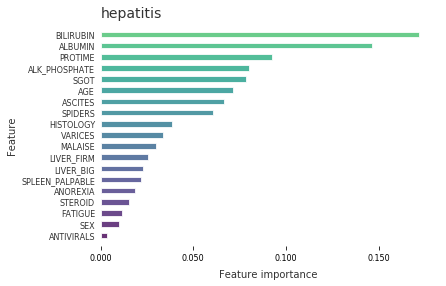

In [5]:
from scripts.featureImportance import *
featureImportance(data) 

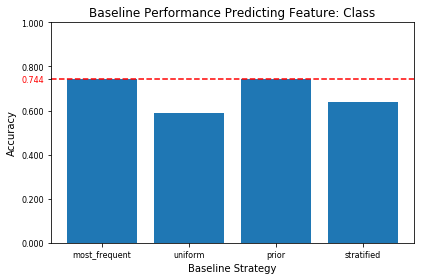

In [6]:
from scripts.baselines import *
maxBaseline = generateBaselines(data, problemType) 

c:\users\hugo\anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


Median execution time in ms: 0.0
Mean execution time in ms: 138.52941176470588


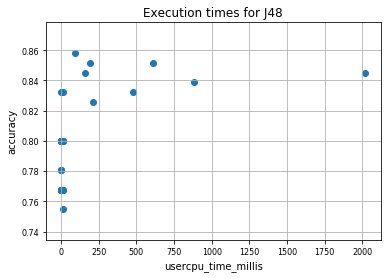

Median execution time in ms: 0.0
Mean execution time in ms: 6.875


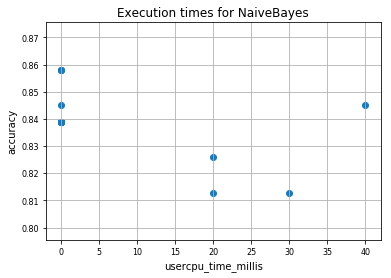

Run already exists in OpenML, WIP
Median execution time in ms: 48.4375
Mean execution time in ms: 43.23285


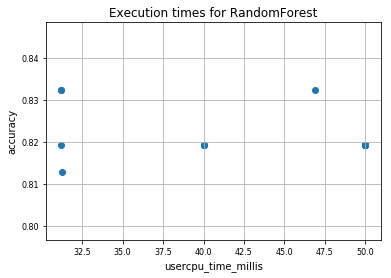

Median execution time in ms: 25.0
Mean execution time in ms: 227.25


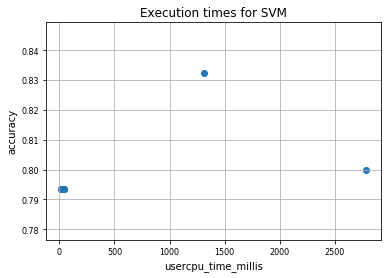

Median execution time in ms: 0.0
Mean execution time in ms: 6.40469375


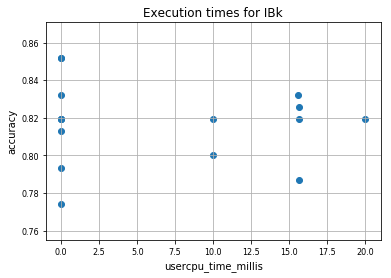

Run already exists in OpenML, WIP


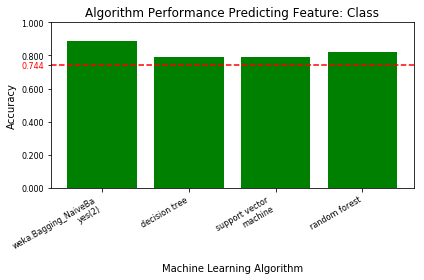

In [7]:
from scripts.machineLearningAlgorithms import *
strats = runMachineLearningAlgorithms(data, comp, strats, problemType, task, showRuntimePrediction=True, runTPOT=False)
plot_alg(data, strats, maxBaseline, problemType) 